In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder.appName("DataFrames").getOrCreate()
df = spark.read.option('header',True).option('inferSchema',True).csv('/Volumes/workspace/default/practice/spark.csv')
df.printSchema()


root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Blood Type: string (nullable = true)
 |-- Medical Condition: string (nullable = true)
 |-- Date of Admission: date (nullable = true)
 |-- Doctor: string (nullable = true)
 |-- Hospital: string (nullable = true)
 |-- Insurance Provider: string (nullable = true)
 |-- Billing Amount: double (nullable = true)
 |-- Room Number: integer (nullable = true)
 |-- Admission Type: string (nullable = true)
 |-- Discharge Date: date (nullable = true)
 |-- Medication: string (nullable = true)
 |-- Test Results: string (nullable = true)



In [0]:
print(df.columns)

['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


In [0]:
df.count()
total_rows = df.count()
print("Total number of rows:", total_rows)

Total number of rows: 55500


In [0]:
display(df.limit(10))

Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2024-02-02,Paracetamol,Normal
LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,2022-10-07,Aspirin,Normal
andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,2020-12-18,Ibuprofen,Abnormal
adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,2022-10-09,Penicillin,Abnormal
EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.11095,389,Urgent,2023-12-24,Ibuprofen,Normal
edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.87234,389,Emergency,2020-11-15,Paracetamol,Inconclusive
CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.46272,277,Emergency,2022-01-07,Paracetamol,Inconclusive
JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.22279,316,Elective,2020-07-14,Aspirin,Abnormal
ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.63106,249,Elective,2021-06-22,Paracetamol,Inconclusive


In [0]:
#Find the number of unique values for each categorical column
for c in ["Blood Type", "Doctor", "Admission Type", "Medication", "Insurance Provider"]:
     print(f"{c}: {df.select(c).distinct().count()} unique values")


Blood Type: 8 unique values
Doctor: 40341 unique values
Admission Type: 3 unique values
Medication: 5 unique values
Insurance Provider: 5 unique values


In [0]:
#Find the count, mean, stddev, min, and max for the numeric columns
numeric_cols = ["Age", "Billing Amount"]  
display(df.select(numeric_cols).describe())


summary,Age,Billing Amount
count,55500,55500
mean,51.53945945945946,25539.316097199575
stddev,19.602453808514344,14211.454430869862
min,13,-2008.49214
max,89,52764.27674


In [0]:
#Find Earliest and Latest Admission
df.select(
    min("Date of Admission").alias("Earliest Admission"),
    max("Discharge Date").alias("Latest Discharge")
).display()


Earliest Admission,Latest Discharge
2019-05-08,2024-06-06


In [0]:
#Find relationship between Test Results and Admission Type
display(df.crosstab("Test Results", "Admission Type"))

Test Results_Admission Type,Elective,Emergency,Urgent
Normal,6241,6106,6170
Abnormal,6296,6091,6240
Inconclusive,6118,6072,6166


In [0]:
#Find the average billing amount for each test result
avg_billing = df.groupBy("Test Results").agg(avg("Billing Amount").alias("avg_billing_amount"))
display(avg_billing)

Test Results,avg_billing_amount
Normal,25456.647190930235
Abnormal,25538.353551613476
Inconclusive,25623.686846492707


In [0]:
#Find the average age for each test result
avg_age = df.groupBy("Test Results").agg(avg("Age").alias("avg_age"))
display(avg_age)

Test Results,avg_age
Normal,51.31527785278393
Abnormal,51.62591936436356
Inconclusive,51.677870995859664


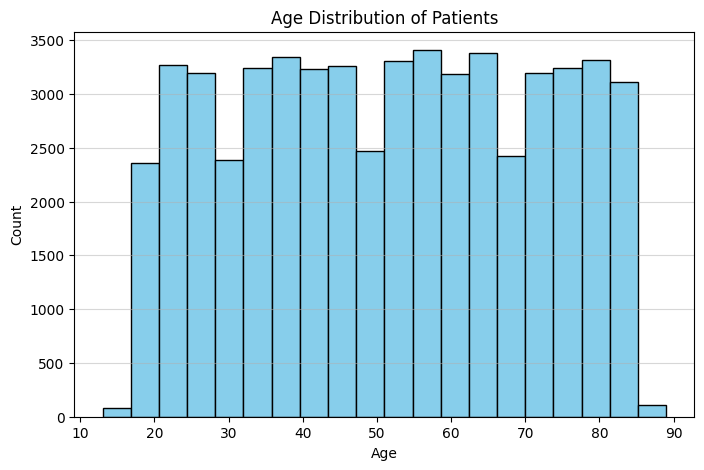

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to pandas for easy plotting
age_df = df.select("Age").toPandas()

plt.figure(figsize=(8,5))
plt.hist(age_df["Age"], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.5)
plt.show()
